# Import library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr

import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

# Load Datasets

In [2]:
all_df=pd.read_excel("trainDataset.xls",index_col=None)
all_df.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


# Drop unused column

In [3]:
all_df=all_df.drop(columns=['ID', 'RelapseFreeSurvival (outcome)'])
all_df.head()

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,41.0,0,0,0,1,3,3,1,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,39.0,1,1,0,0,3,3,1,1,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,31.0,0,0,0,1,2,1,1,0,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,35.0,0,0,0,1,3,3,1,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,61.0,1,0,0,0,2,1,1,0,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [4]:
all_df = all_df.rename(columns={'pCR (outcome)': 'pCR'})
all_df.head()

,pCR,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,41.0,0,0,0,1,3,3,1,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,39.0,1,1,0,0,3,3,1,1,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,31.0,0,0,0,1,2,1,1,0,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,35.0,0,0,0,1,3,3,1,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,61.0,1,0,0,0,2,1,1,0,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


# Drop Missing value (999) from the outcome column

In [5]:
all_df = all_df.drop(all_df[all_df['pCR'] == 999].index)
all_df.head()

,pCR,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,41.0,0,0,0,1,3,3,1,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,39.0,1,1,0,0,3,3,1,1,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,31.0,0,0,0,1,2,1,1,0,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,35.0,0,0,0,1,3,3,1,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,61.0,1,0,0,0,2,1,1,0,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


# Fill in missing value in the remain column

In [6]:
#Replace 999 with Nan
all_df = all_df.replace(999, np.nan)

In [7]:
#Fill in the null values using KNNImputer
knnimputer = KNNImputer(n_neighbors=7)
all_df.iloc[:,:] = knnimputer.fit_transform(all_df)

# Dataset Information

In [8]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 399
Columns: 118 entries, pCR to original_ngtdm_Strength
dtypes: float64(118)
memory usage: 367.2 KB


In [9]:
all_df.describe()

,pCR,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,3.950000e+02,3.950000e+02,3.950000e+02,395.000000,3.950000e+02,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.243038,51.860679,0.541772,0.402893,0.314286,0.333454,2.403978,1.589150,1.140687,0.520434,...,3.939499e-01,3.892751e-01,2.710568e+00,0.003282,5.753750e+07,178.535250,32911.425364,0.056585,0.005941,0.029639
std,0.429462,10.930083,0.498884,0.490785,0.464485,0.471496,0.500611,0.772699,0.346648,0.499594,...,1.680516e-01,1.629895e-01,7.588167e-01,0.002403,7.108221e+08,1051.812623,178630.940199,0.047387,0.008434,0.116617
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,44.425736,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,...,3.194476e-01,3.165775e-01,2.327081e+00,0.001310,1.119281e+06,18.723677,0.001843,0.018575,0.000309,0.001474
50%,0.000000,51.200548,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,4.097481e-01,4.048276e-01,2.807355e+00,0.002847,3.469426e+06,68.117000,0.004383,0.046980,0.002294,0.003208
75%,0.000000,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,...,5.000099e-01,4.957960e-01,3.277613e+00,0.004679,9.341503e+06,155.512297,0.013772,0.084692,0.007895,0.009504
max,1.000000,79.603012,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,1.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


In [10]:
all_df['pCR'].value_counts()

0.0    299
1.0     96
Name: pCR, dtype: int64

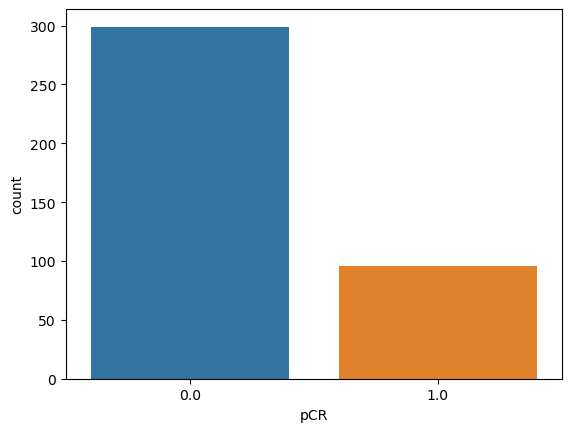

In [11]:
sns.countplot(x="pCR", data=all_df)

# Split datasets into X and Y for prediction

In [12]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = all_df.drop(['pCR'],axis=1)
# Separating out the target
y = all_df['pCR']
x.head()

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,2.0,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1.0,1.0,0.0,0.0,3.0,3.0,1.0,1.0,2.0,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,3.0,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


# Standardizing the features

In [13]:
Xs = StandardScaler().fit_transform(x)

# Apply L1-based features selection

In [14]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.02, penalty="l1", dual=False, random_state=1).fit(Xs, y)
model = SelectFromModel(lsvc, prefit=True)
Xs_fs = model.transform(Xs)
Xs_fs.shape


(395, 7)

In [15]:
Xs_fs

array([[-1.08734559, -0.82195692, -0.67749064, ...,  0.96112851,
        -1.03297871, -1.67524271],
       [ 0.91967081,  1.21817852, -0.67749064, ...,  0.96112851,
         0.61770199,  0.85253282],
       [-1.08734559, -0.82195692, -0.67749064, ..., -1.04303463,
         0.56290128,  0.82122119],
       ...,
       [ 0.91967081, -0.82195692, -0.67749064, ...,  0.96112851,
        -0.23930732,  0.9041278 ],
       [ 0.91967081, -0.82195692, -0.67749064, ...,  0.96112851,
         0.50853913, -0.9179086 ],
       [-1.08734559, -0.82195692,  1.47816139, ..., -1.04303463,
        -0.17765944, -0.02411789]])

In [16]:
feature_idx = model.get_support()
feature_name = x.columns[feature_idx]
feature_name

Index(['ER', 'PgR', 'HER2', 'Proliferation', 'LNStatus',
       'original_firstorder_10Percentile',
       'original_gldm_LargeDependenceEmphasis'],
      dtype='object')

# Split dataset into test and training test

In [17]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs_fs, y, test_size=0.2, 
random_state=1, stratify=y)

# MLP model with default parameter

In [18]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=10000).fit(Xs_train, y_train)
predict=clf.predict(Xs_test)

In [19]:
# Compare the difference between the predicted value and actual value
pred_data = pd.DataFrame({'Actual':y_test,'Predicted':predict,'Difference':y_test-predict})

print(pred_data)

     Actual  Predicted  Difference
32      0.0        0.0         0.0
127     0.0        0.0         0.0
92      0.0        0.0         0.0
334     0.0        1.0        -1.0
13      0.0        0.0         0.0
..      ...        ...         ...
278     0.0        0.0         0.0
104     0.0        0.0         0.0
130     1.0        1.0         0.0
153     1.0        0.0         1.0
350     0.0        1.0        -1.0

[79 rows x 3 columns]


# Evaluation

In [20]:
from sklearn.model_selection import cross_val_score
n_folds = 5
cv_error = np.average(cross_val_score(clf, Xs_fs, y, cv=n_folds))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, cv_error))

The 5-fold cross-validation accuracy score for this classifier is 0.73


In [21]:
classifier_score = clf.score(Xs_test, y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))

The classifier accuracy score is 0.68


# Hyperparameter optimisation

In [22]:
from sklearn.neural_network import MLPClassifier
mlf = MLPClassifier(random_state=1, max_iter=10000)

In [23]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [24]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(mlf, parameter_space, scoring="accuracy", n_jobs=-1, cv=5)
grid_search.fit(Xs_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=10000, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [25]:
# Best paramete set
print('Best parameters found:\n', grid_search.best_params_)

# All results
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.756 (+/-0.075) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.690 (+/-0.086) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.756 (+/-0.075) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.690 (+/-0.086) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.740 (+/-0.050) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.677 (+/-0.124) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam

# Apply optimise hyperparameter to ANN Model

In [26]:
from sklearn.neural_network import MLPClassifier


In [27]:
clf = MLPClassifier(random_state=1, max_iter=10000).set_params(**grid_search.best_params_).fit(Xs_train, y_train)
predict=clf.predict(Xs_test)

In [28]:
# Compare the difference between the predicted value and actual value
pred_data = pd.DataFrame({'Actual':y_test,'Predicted':predict,'Difference':y_test-predict})

print(pred_data)

     Actual  Predicted  Difference
32      0.0        0.0         0.0
127     0.0        0.0         0.0
92      0.0        0.0         0.0
334     0.0        0.0         0.0
13      0.0        0.0         0.0
..      ...        ...         ...
278     0.0        0.0         0.0
104     0.0        0.0         0.0
130     1.0        0.0         1.0
153     1.0        0.0         1.0
350     0.0        0.0         0.0

[79 rows x 3 columns]


# Classification accuracy

In [29]:
classifier_score = clf.score(Xs_test, y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))

The classifier accuracy score is 0.75


# K-fold Cross validation

In [30]:
from sklearn.model_selection import cross_val_score
n_folds = 5
clf = MLPClassifier(random_state=1, max_iter=10000).set_params(**grid_search.best_params_)
cv_error = np.average(cross_val_score(clf, Xs_fs, y, scoring="accuracy", cv=n_folds))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, cv_error))

The 5-fold cross-validation accuracy score for this classifier is 0.77


## F1 score with cross validation

In [31]:
mean_score = cross_val_score(clf, Xs_fs, y, scoring="f1", cv = n_folds).mean()
std_score = cross_val_score(clf, Xs_fs, y, scoring="f1", cv = n_folds).std()
print("K-Fold mean score of f1 =", mean_score)
print("K-Fold std score of f1  =", std_score)


K-Fold mean score of f1 = 0.28124798711755233
K-Fold std score of f1  = 0.1485597455683212


In [32]:
mean_score = cross_val_score(clf, Xs_train, y_train, scoring="f1", cv = n_folds).mean()
std_score = cross_val_score(clf, Xs_train, y_train, scoring="f1", cv = n_folds).std()
print("K-Fold mean score of f1 =", mean_score)
print("K-Fold std score of f1  =", std_score)


K-Fold mean score of f1 = 0.31191664933083696
K-Fold std score of f1  = 0.10323683437197735


In [33]:
from sklearn.model_selection import cross_val_score
n_folds = 5
clf = MLPClassifier(random_state=1, max_iter=10000).set_params(**grid_search.best_params_)
cv_error = np.average(cross_val_score(clf, Xs_train, y_train, cv=n_folds))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, cv_error))

The 5-fold cross-validation accuracy score for this classifier is 0.77


In [34]:
mean_score = cross_val_score(clf, Xs_test, y_test, scoring="f1", cv = n_folds).mean()
std_score = cross_val_score(clf, Xs_test, y_test, scoring="f1", cv = n_folds).std()
print("K-Fold mean score of f1 =", mean_score)
print("K-Fold std score of f1  =", std_score)


K-Fold mean score of f1 = 0.29047619047619044
K-Fold std score of f1  = 0.266155973571088


In [35]:
from sklearn.model_selection import cross_val_score
n_folds = 5
clf = MLPClassifier(random_state=1, max_iter=10000).set_params(**grid_search.best_params_)
cv_error = np.average(cross_val_score(clf, Xs_test, y_test, cv=n_folds))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, cv_error))

The 5-fold cross-validation accuracy score for this classifier is 0.76


# Confusion matrix

              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        60
         1.0       0.43      0.16      0.23        19

    accuracy                           0.75        79
   macro avg       0.60      0.55      0.54        79
weighted avg       0.69      0.75      0.70        79



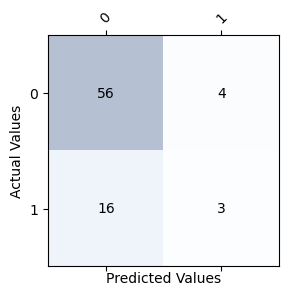

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf.fit(Xs_train, y_train).predict(Xs_test)
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix,
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
classes=["0","1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');
print(classification_report(y_test, y_pred ))

# RoC curve

/Users/alden/opt/anaconda3/envs/mle_tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


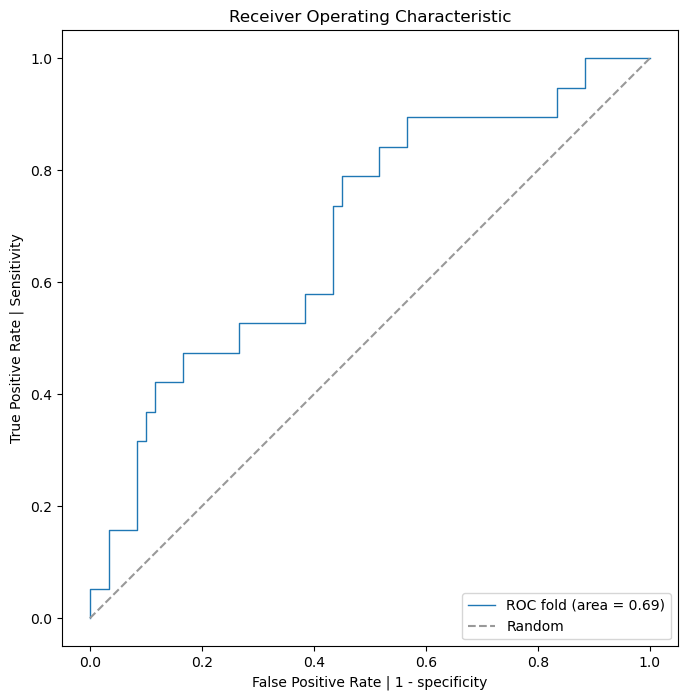

In [37]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(Xs_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate | 1 - specificity')
plt.ylabel('True Positive Rate | Sensitivity')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.axes().set_aspect(1);

# Save the feature selected name and also the trained model

In [38]:
best_features = pd.DataFrame(feature_name)
best_features.columns = ['best_features']
best_features

,best_features
0,ER
1,PgR
2,HER2
3,Proliferation
4,LNStatus
5,original_firstorder_10Percentile
6,original_gldm_LargeDependenceEmphasis


In [39]:
# Save the features selected into csv file to load in test file
best_features.to_csv('MLP_LinearSVC_best_feature.csv',index=False)

# Save the model for prediction in test file

In [41]:
# Set the model again before saving
import pickle

best_model = MLPClassifier(random_state=1, max_iter=10000).set_params(**grid_search.best_params_)
best_model.fit(Xs_train, y_train)
file_name  = 'MLP_linearSVC_best_model.sav'
pickle.dump(best_model,open(file_name,'wb'))
